In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv',engine='python')
test_data = pd.read_csv('test.csv',engine='python')
df_col = pd.read_csv('Home price.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/home/qin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


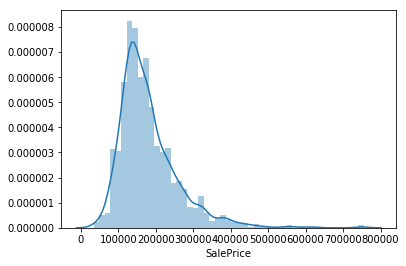

In [5]:
sns.distplot(train_data['SalePrice'])

In [6]:
cate_list = df_col[df_col['Type'] == 'C']['Name']
num_list = df_col[df_col['Type'] == 'N']['Name']

In [9]:
def query(col_name):
    print(df_col[df_col['Name']==col_name]['Comments'])

3    應該是到最近的街的距離
Name: Comments, dtype: object


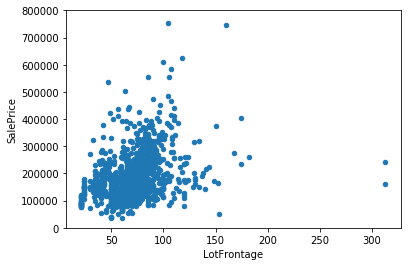

4    地基大小
Name: Comments, dtype: object


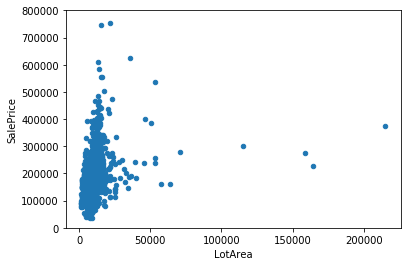

17    建造年份
Name: Comments, dtype: object


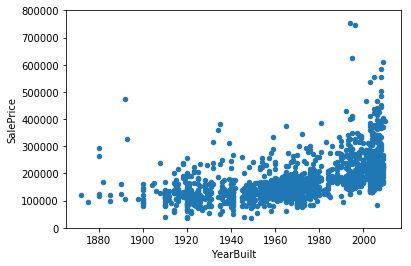

18    重整年份
Name: Comments, dtype: object


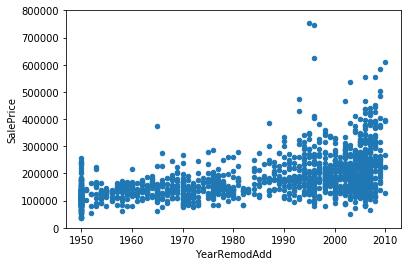

24    砌體貼面面積，石板大小 ranking
Name: Comments, dtype: object


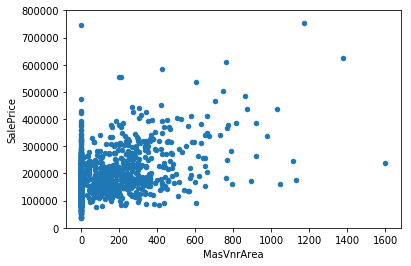

32    (地下室)Type1完成的大小
Name: Comments, dtype: object


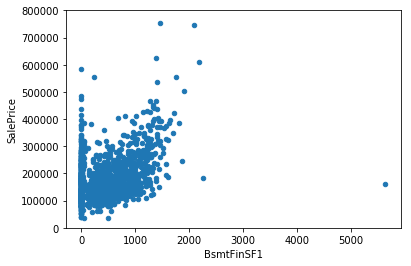

34    (地下室)Type2完成的大小
Name: Comments, dtype: object


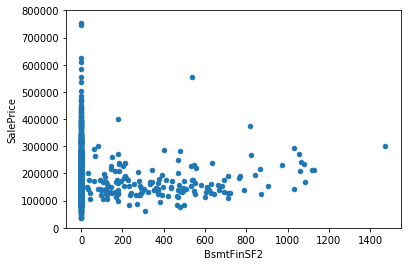

35    地下室未完成的區域大小
Name: Comments, dtype: object


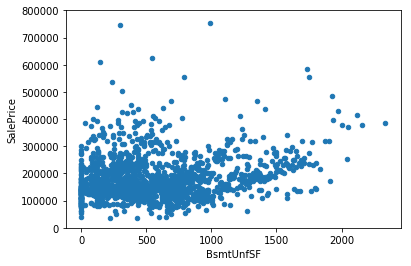

36    整個地下室的區域大小
Name: Comments, dtype: object


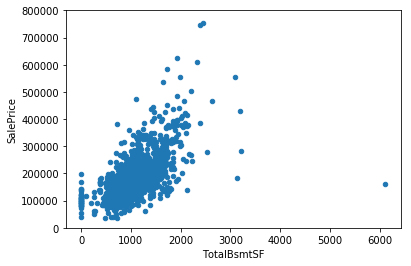

41    第一層樓的面積
Name: Comments, dtype: object


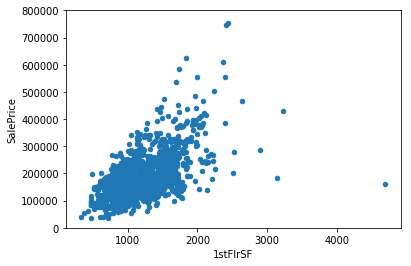

42    第二層樓的面積
Name: Comments, dtype: object


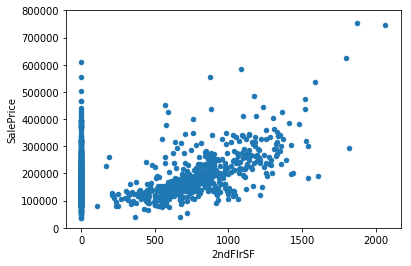

43    整棟樓低品質的部分面積
Name: Comments, dtype: object


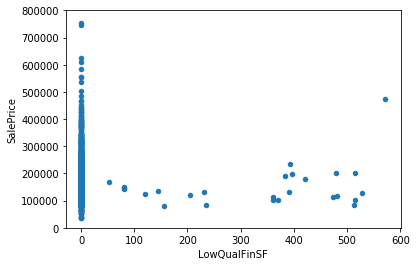

44    居住區域高品質的部分面積
Name: Comments, dtype: object


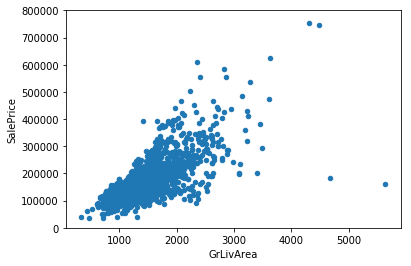

45    地下室的Full浴室
Name: Comments, dtype: object


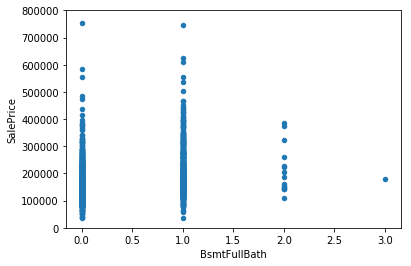

46    地下室的Half浴室
Name: Comments, dtype: object


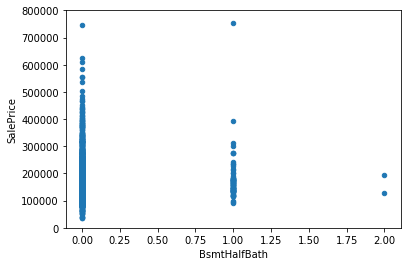

47    Full浴室高於平均品質的數量
Name: Comments, dtype: object


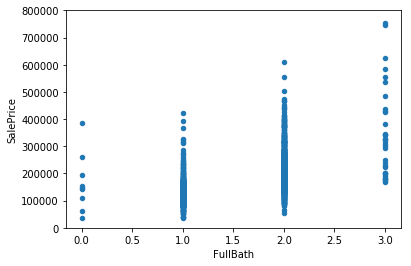

48    Half浴室高於平均品質的數量
Name: Comments, dtype: object


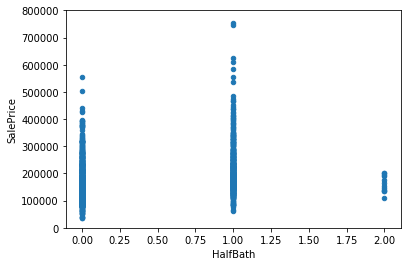

49    優於地下室的房間數量
Name: Comments, dtype: object


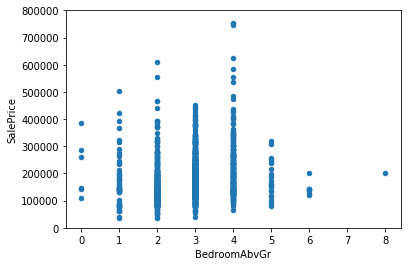

50    廚房數量
Name: Comments, dtype: object


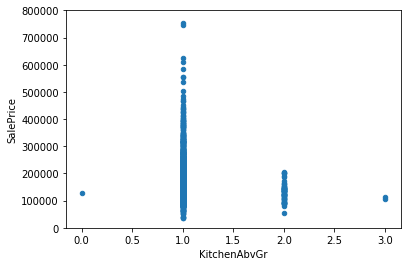

52    整體房間高於平均品質的數量(不含浴室)
Name: Comments, dtype: object


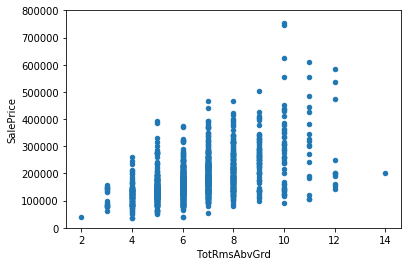

54    壁爐數量
Name: Comments, dtype: object


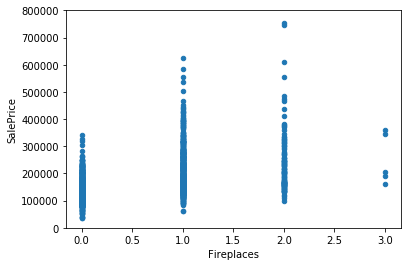

57    車庫建置年份
Name: Comments, dtype: object


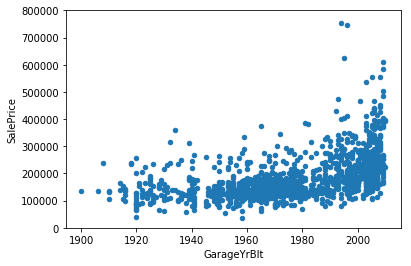

59    車庫可停幾輛車
Name: Comments, dtype: object


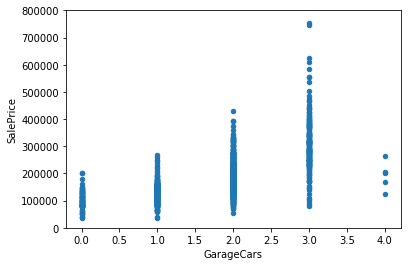

60    車庫大小
Name: Comments, dtype: object


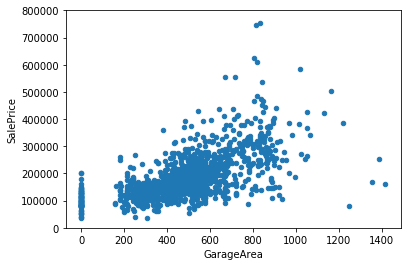

64    露天平臺面積大小
Name: Comments, dtype: object


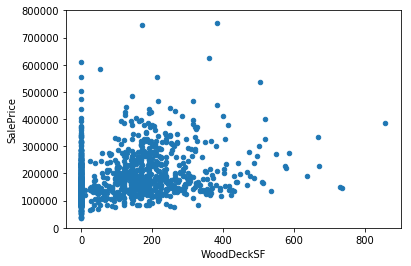

65    門廊開放區面積大小
Name: Comments, dtype: object


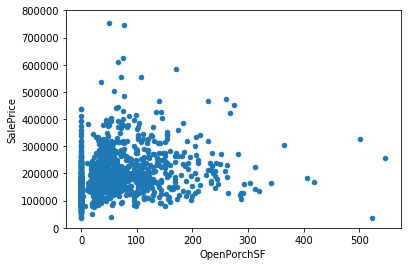

66    門廊封閉區面積大小
Name: Comments, dtype: object


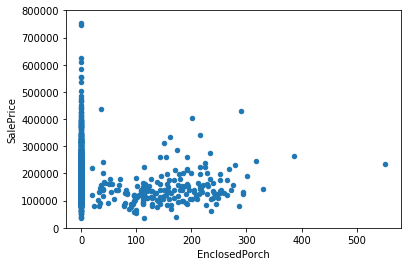

67    隔出來的門廊區的面積大小
Name: Comments, dtype: object


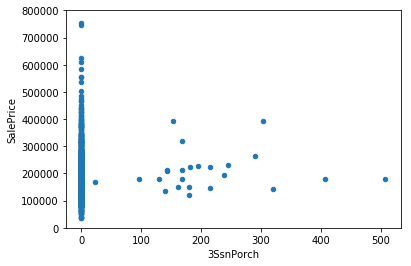

68    陽台
Name: Comments, dtype: object


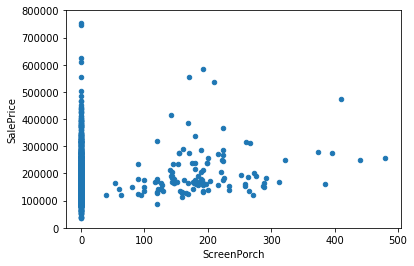

69    游泳池
Name: Comments, dtype: object


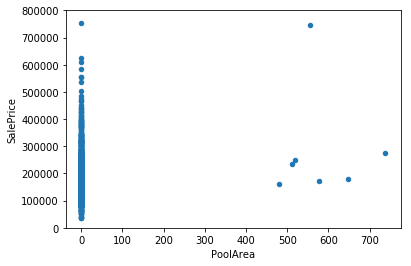

72    其他雜項
Name: Comments, dtype: object


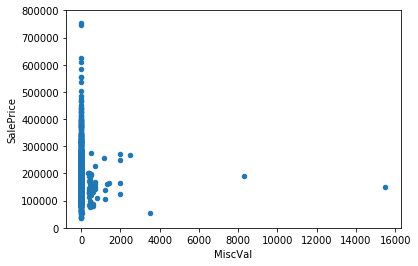

73    賣出月份
Name: Comments, dtype: object


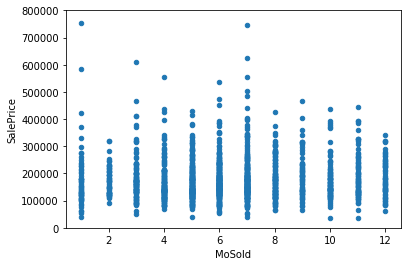

74    賣出年分
Name: Comments, dtype: object


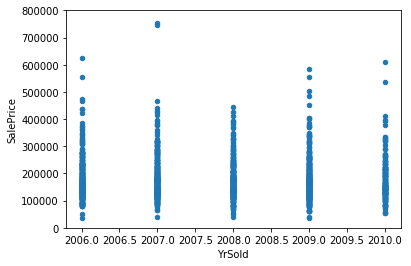

In [11]:
#畫1對1的關係，num數值與sale price的散布圖
def plot_numerical_cate(column_name):
    data = pd.concat([train_data['SalePrice'], train_data[column_name]], axis=1)
    data.plot.scatter(x=column_name, y='SalePrice', ylim=(0,800000))
    plt.show()

for column in num_list[1:]:
    query(column)
    plot_numerical_cate(column)

In [15]:
def bin_sale(num):
    if num<=100000:
        return 'Lower'
    elif 100000<num<=200000:
        return 'Middle'
    elif 200000< num <= 300000:
        return 'Middle High'
    else:
        return 'High'
train_data['bin_sale'] = train_data['SalePrice'].apply(bin_sale)

1    年齡與屋子狀態做分類，沒有ranking關係
Name: Comments, dtype: object


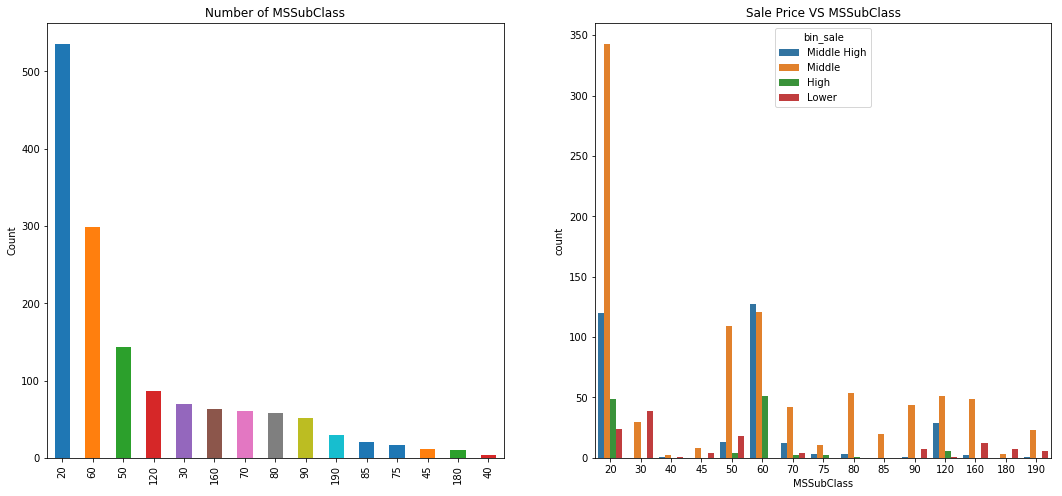

2    分為農業區、商業區、住宅區高密度、住宅區低密度等。
Name: Comments, dtype: object


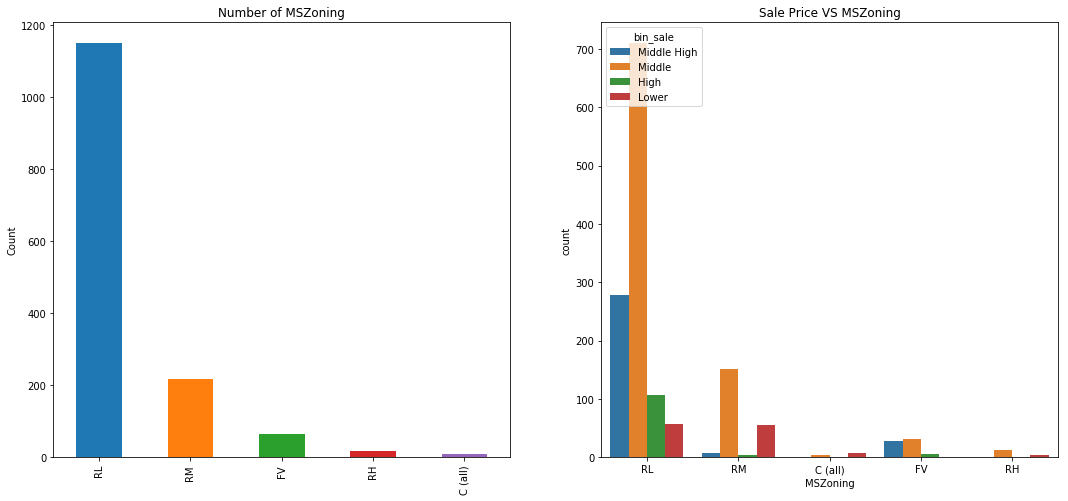

5    路的材質
Name: Comments, dtype: object


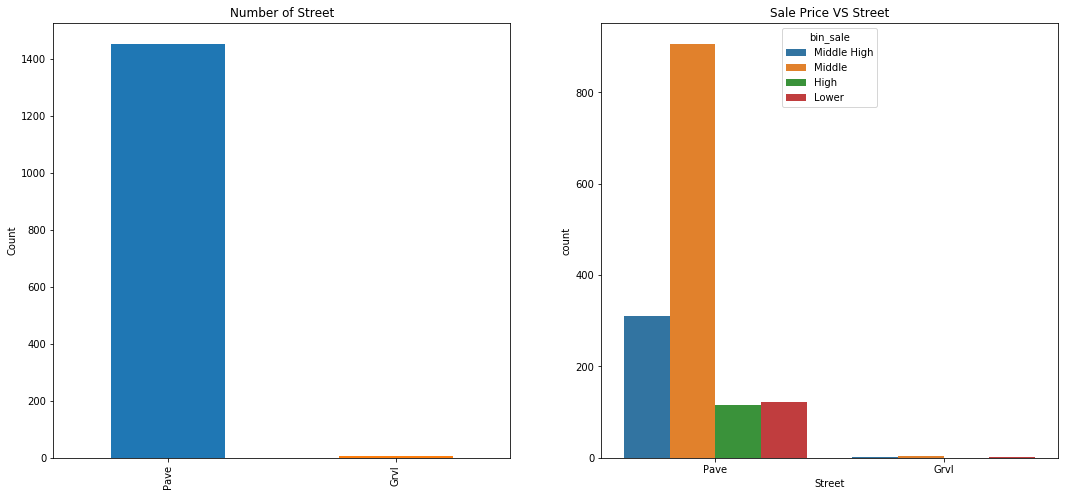

6    走道材質
Name: Comments, dtype: object


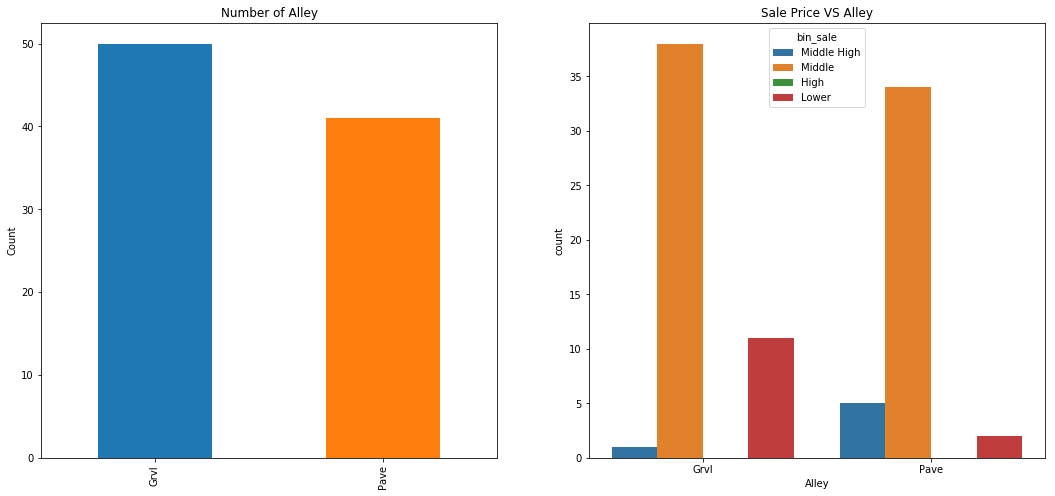

7    地基形狀
Name: Comments, dtype: object


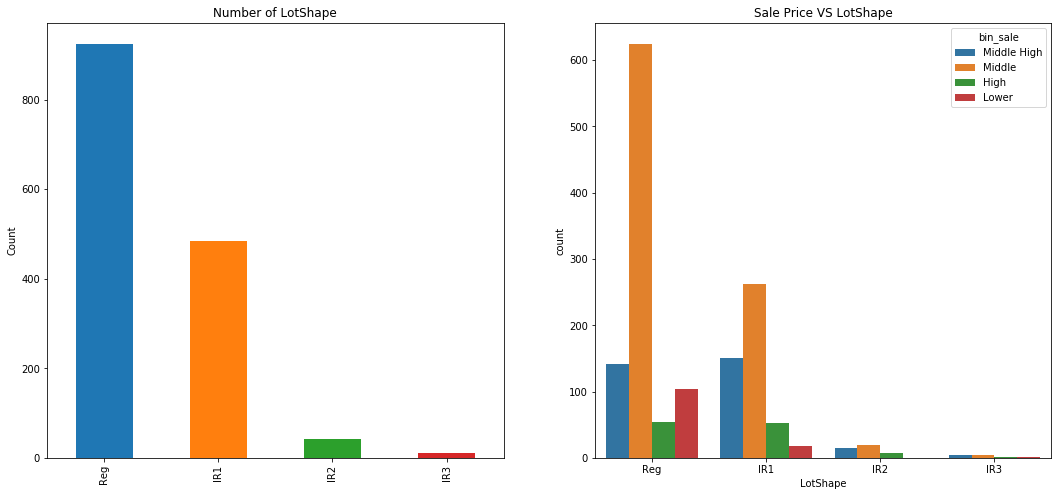

8    地基平坦程度
Name: Comments, dtype: object


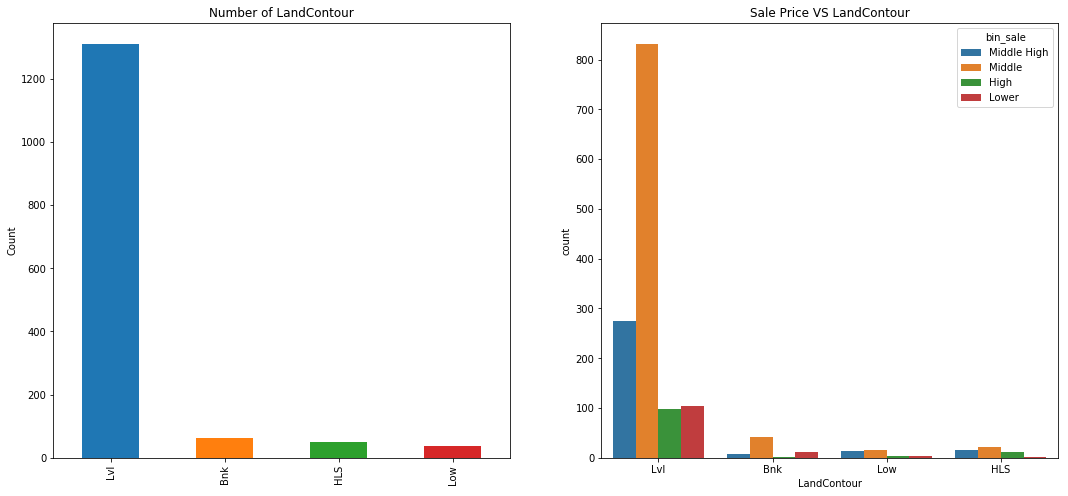

9    格局
Name: Comments, dtype: object


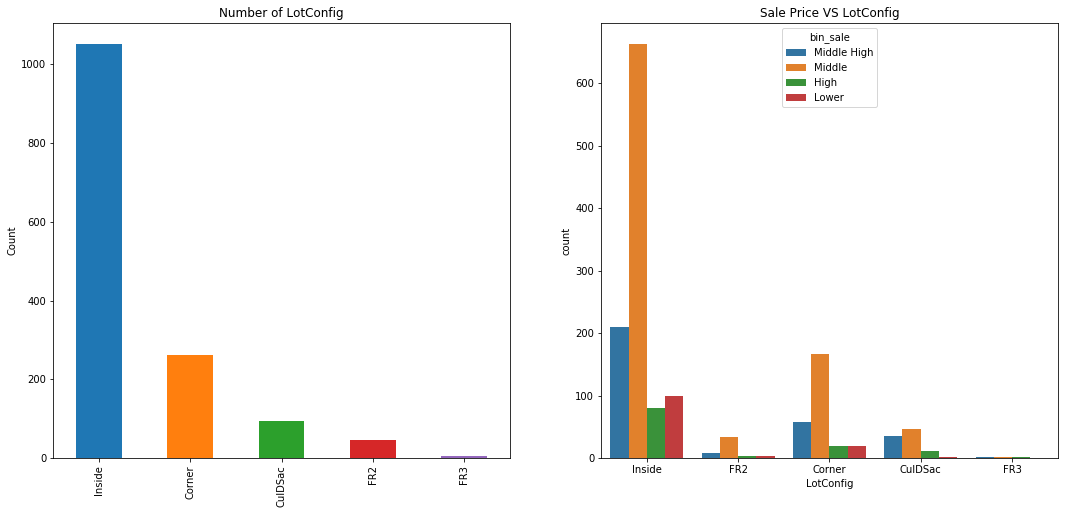

10    區 像是中正區blabla
Name: Comments, dtype: object


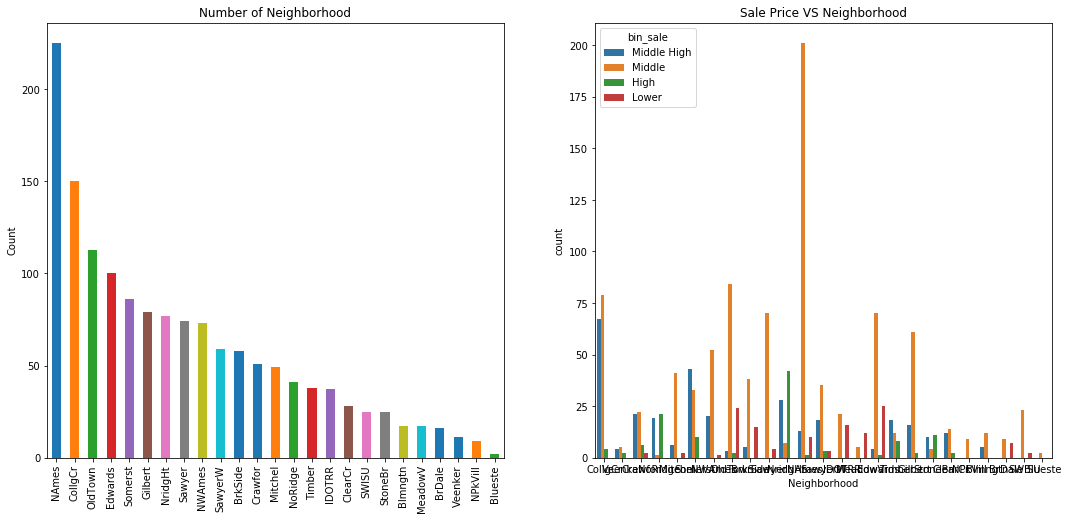

11    附近的大路
Name: Comments, dtype: object


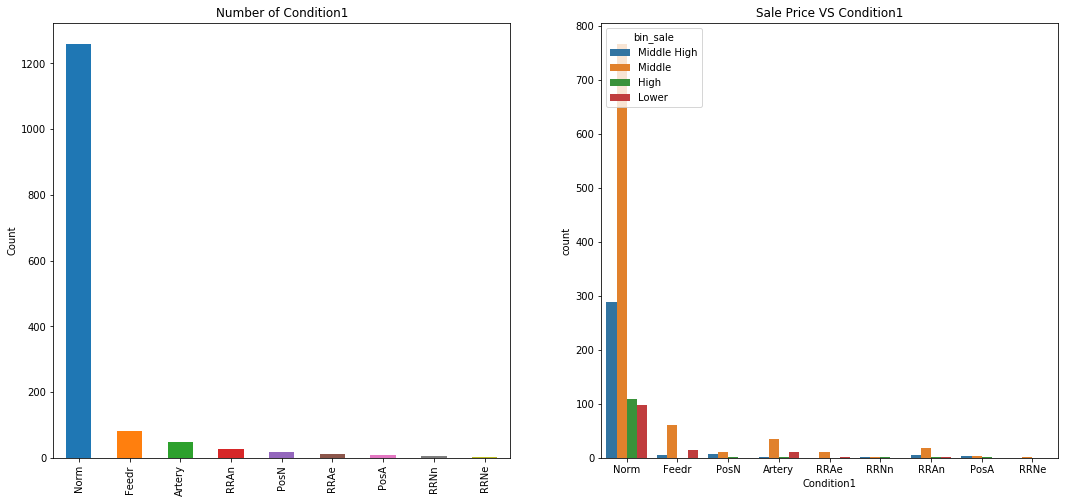

12    附近的大路(如果鄰近靠近一條以上的大路)
Name: Comments, dtype: object


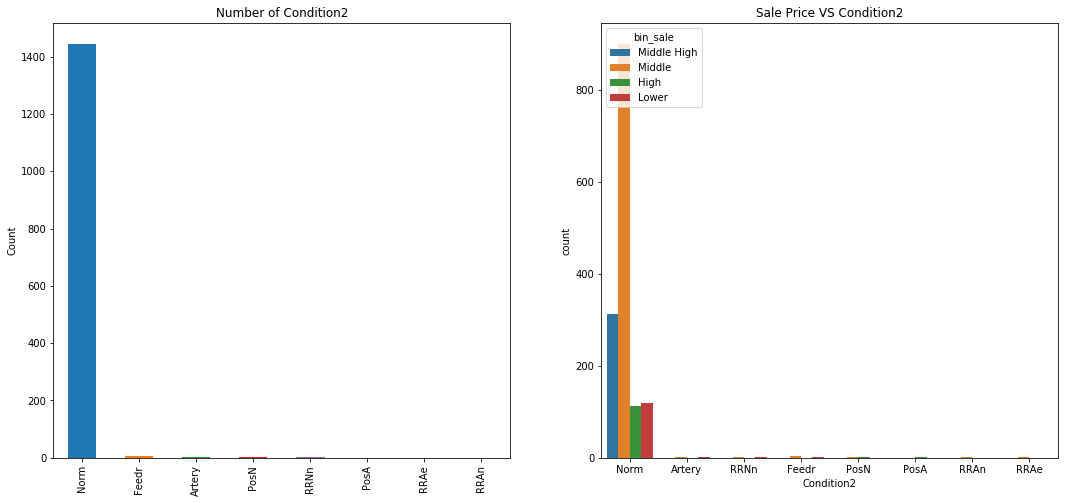

13    房內的格局，有可能MSSUbclass部份資訊重疊
Name: Comments, dtype: object


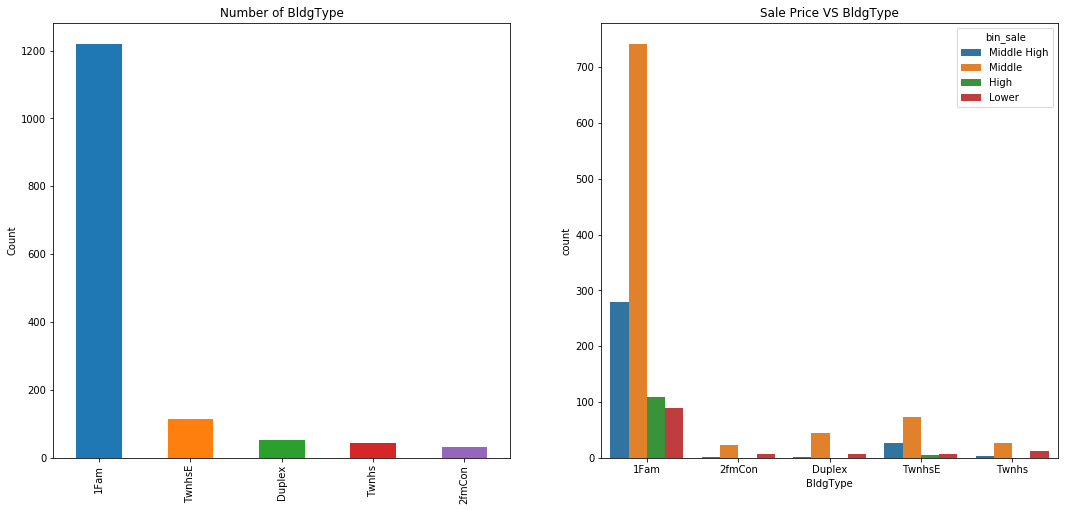

14    房內的格局，比如幾層樓
Name: Comments, dtype: object


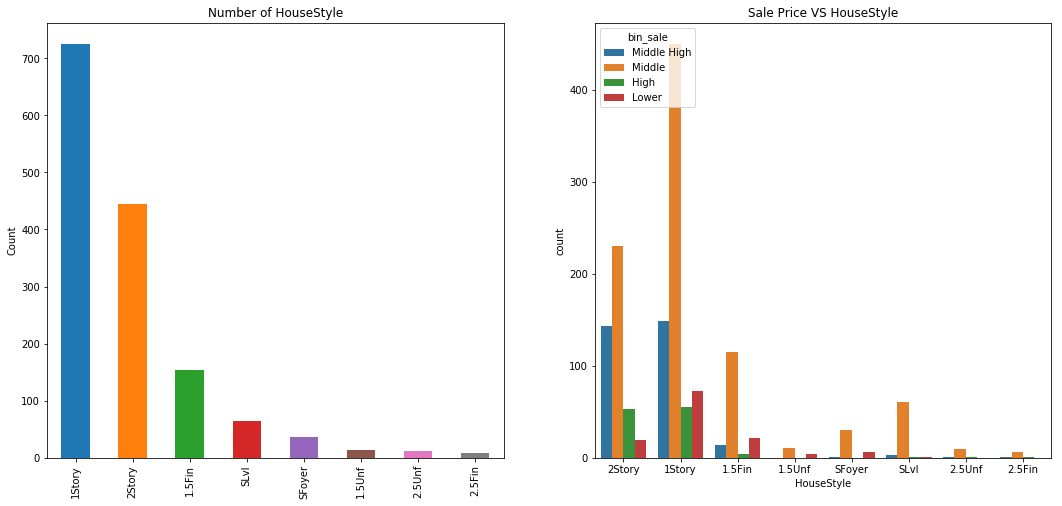

15    整體建材等品質優劣，Ranking data
Name: Comments, dtype: object


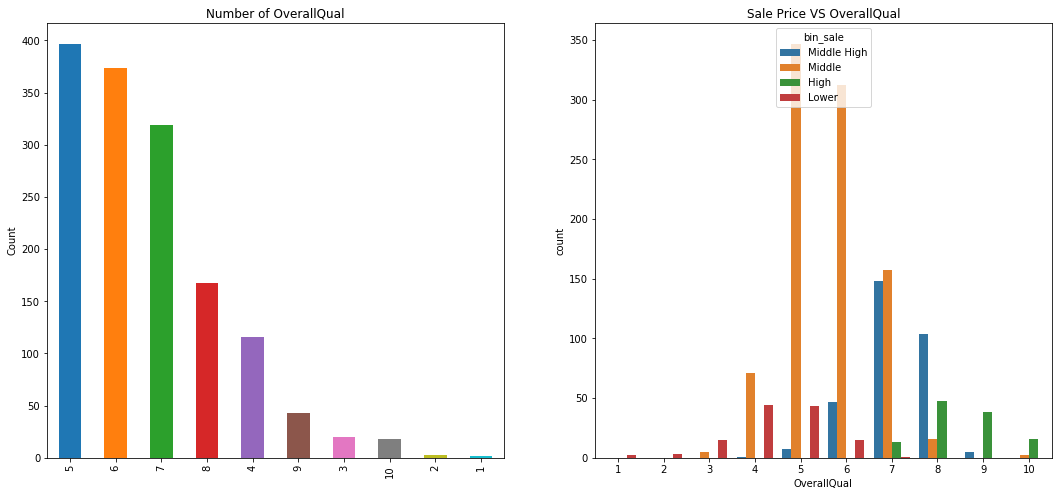

16    整體房屋狀況，Ranking data
Name: Comments, dtype: object


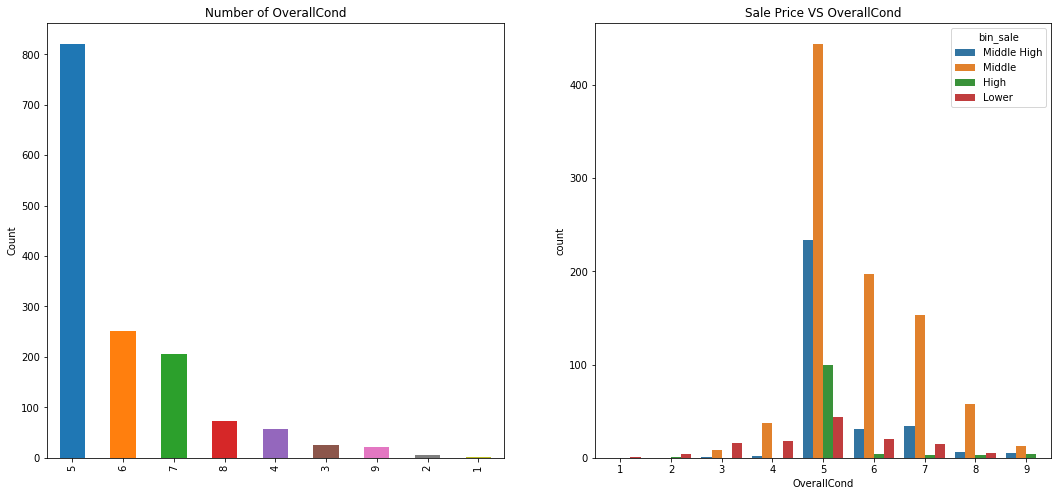

19    屋頂型態，像是:Flat ...
Name: Comments, dtype: object


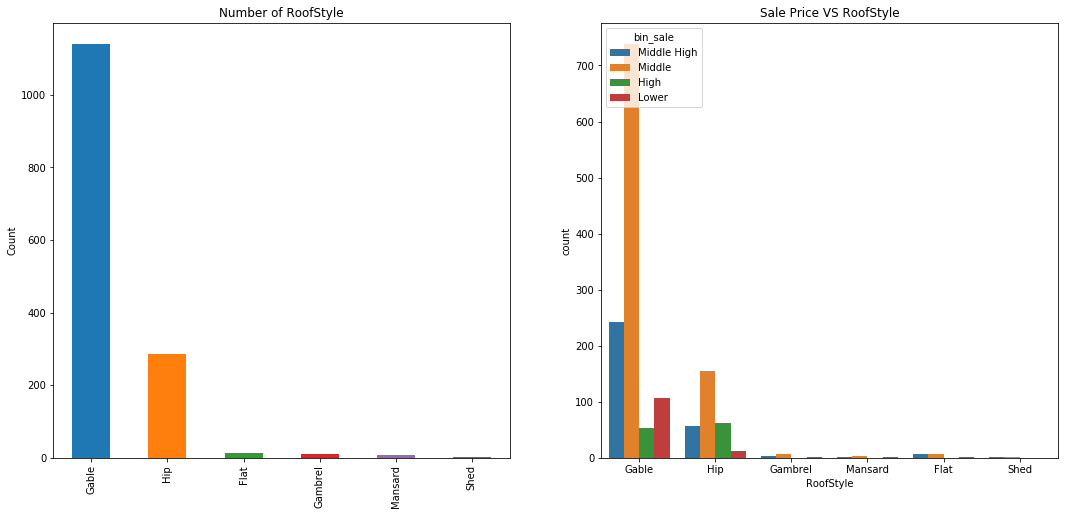

20    屋頂材質
Name: Comments, dtype: object


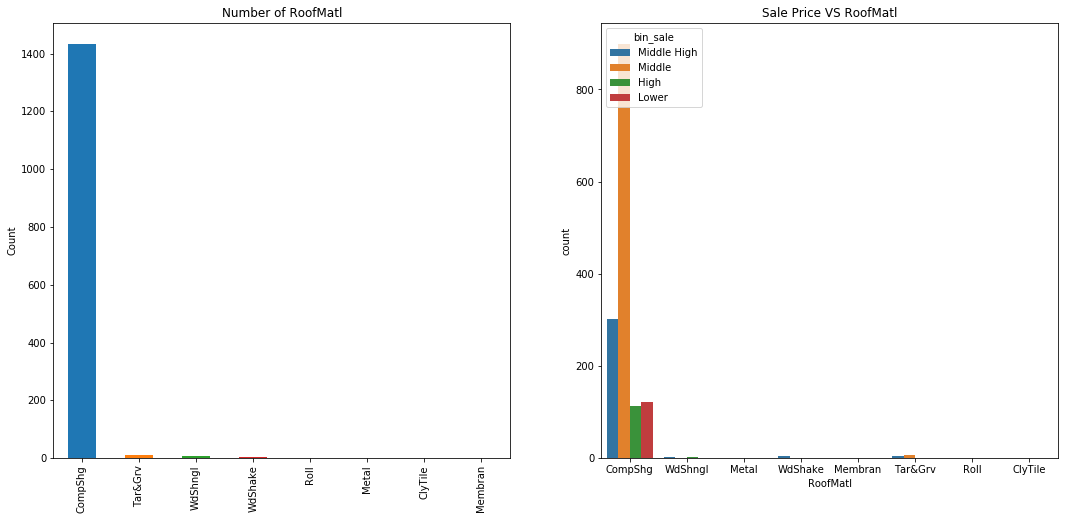

21    屋外牆的材質，例如 brick
Name: Comments, dtype: object


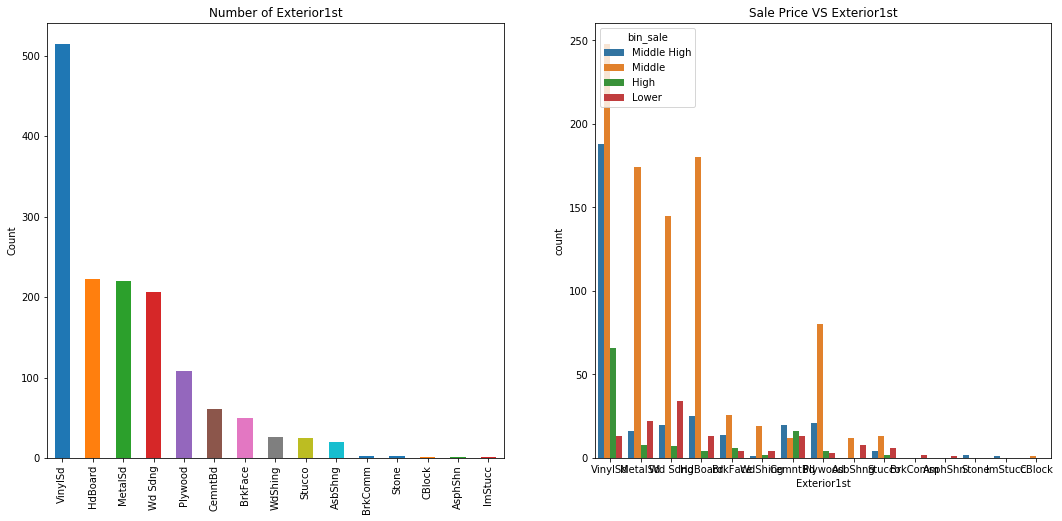

22    屋外牆的材質，如果多於一個種類的話，第二種類的材質
Name: Comments, dtype: object


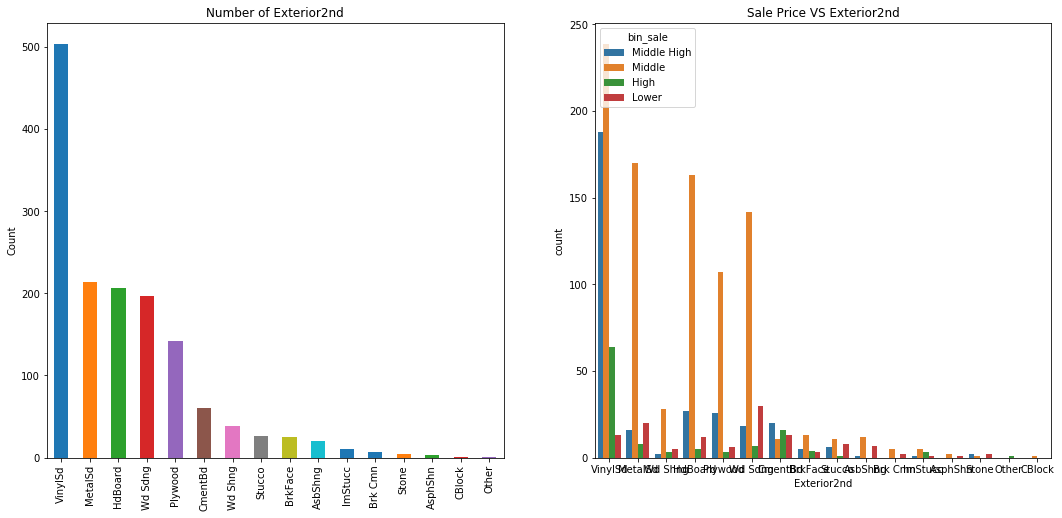

23    砌體貼面種類，石板類型
Name: Comments, dtype: object


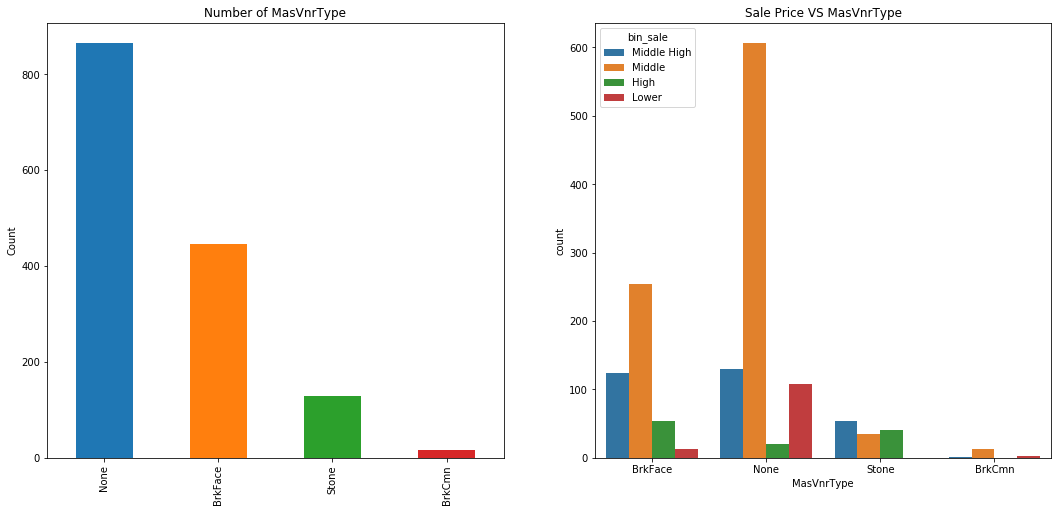

25    外部材質品質 raniking
Name: Comments, dtype: object


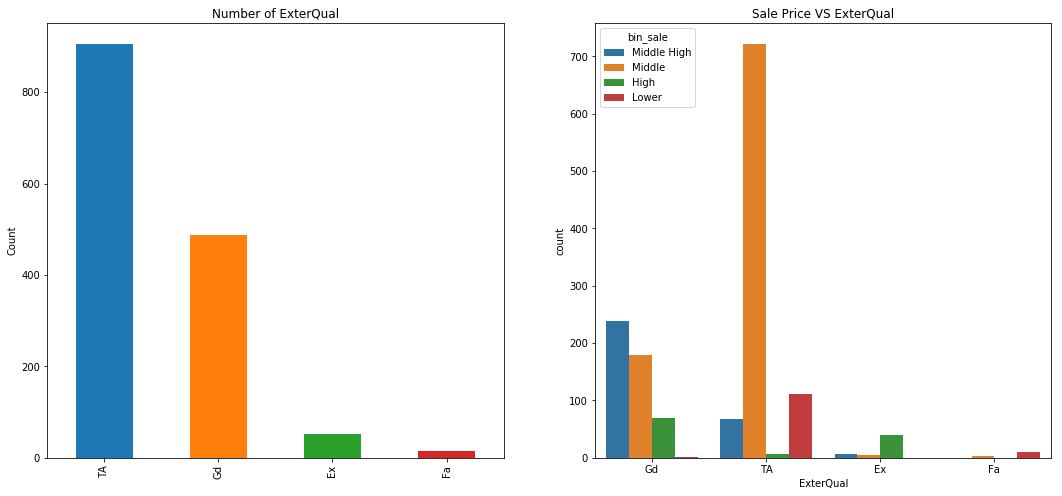

26    外部材質目前狀況
Name: Comments, dtype: object


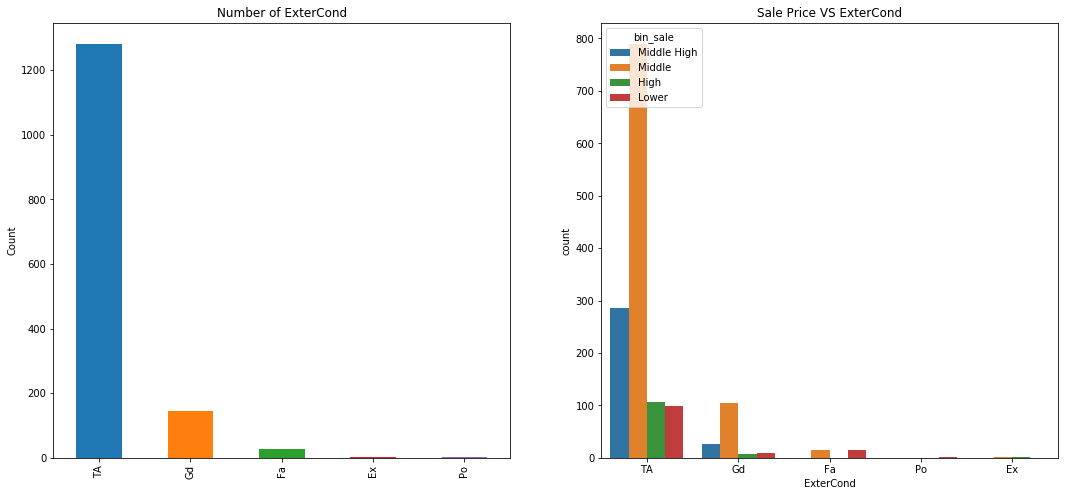

27    ex: brick ,stone
Name: Comments, dtype: object


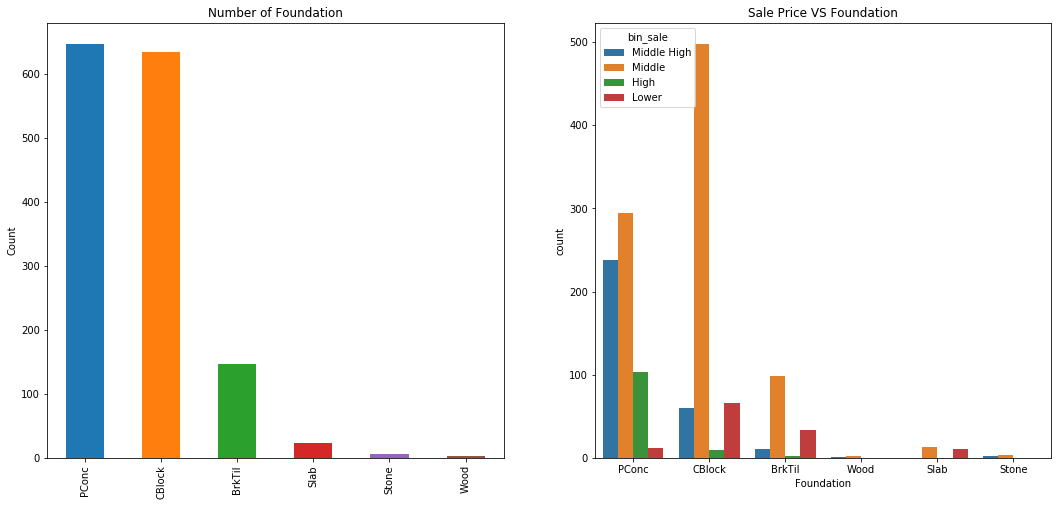

28    地下室高度
Name: Comments, dtype: object


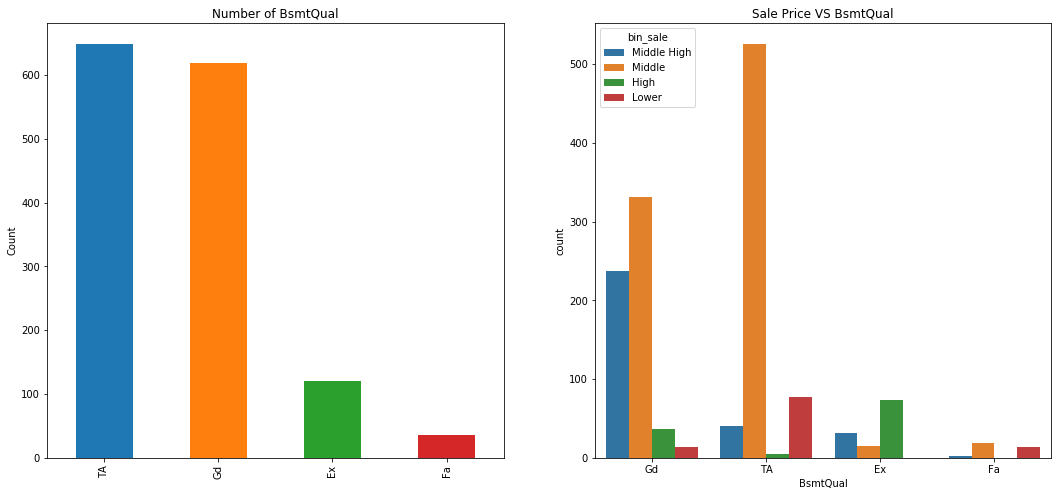

29    地下室狀況
Name: Comments, dtype: object


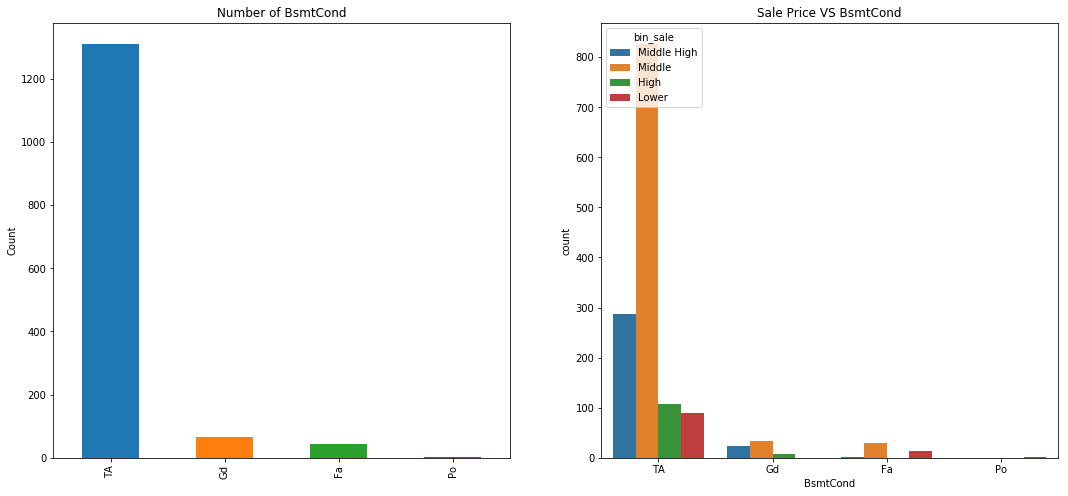

30    庭院外牆對外的曝露程度
Name: Comments, dtype: object


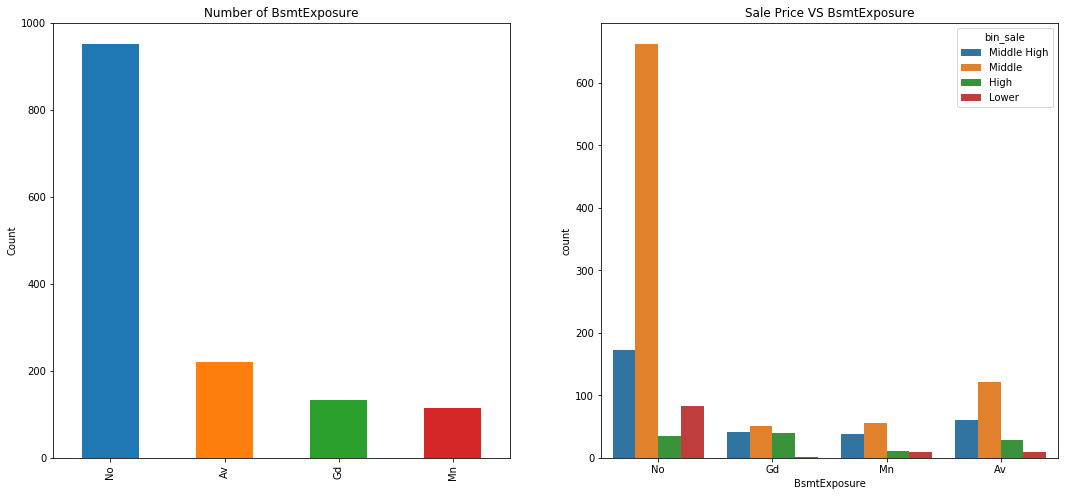

31    地下室品質
Name: Comments, dtype: object


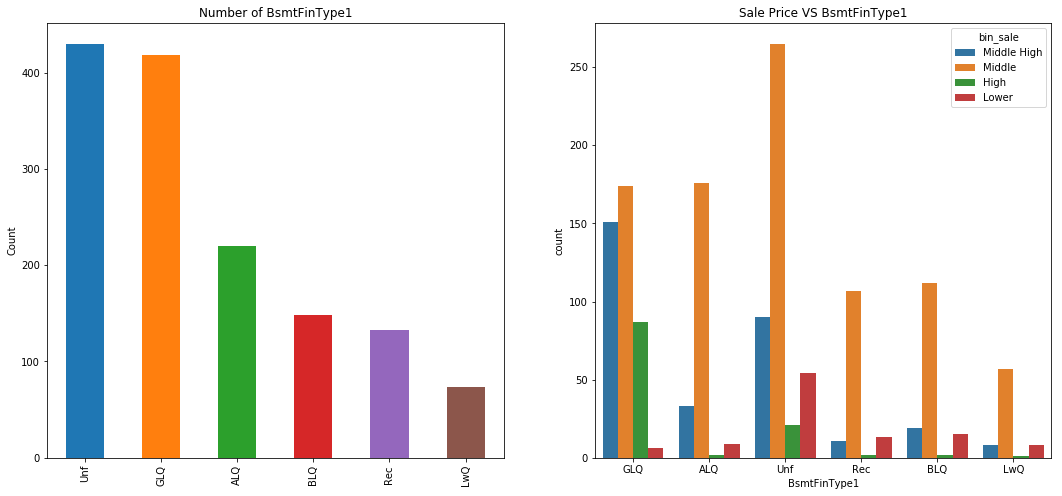

33    (地下室)第二完成區的品質
Name: Comments, dtype: object


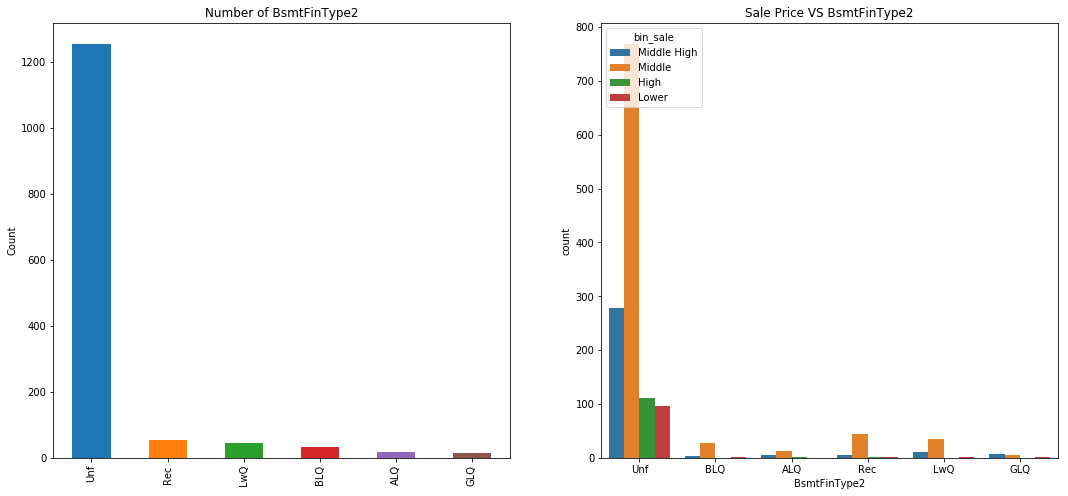

37    暖器種類
Name: Comments, dtype: object


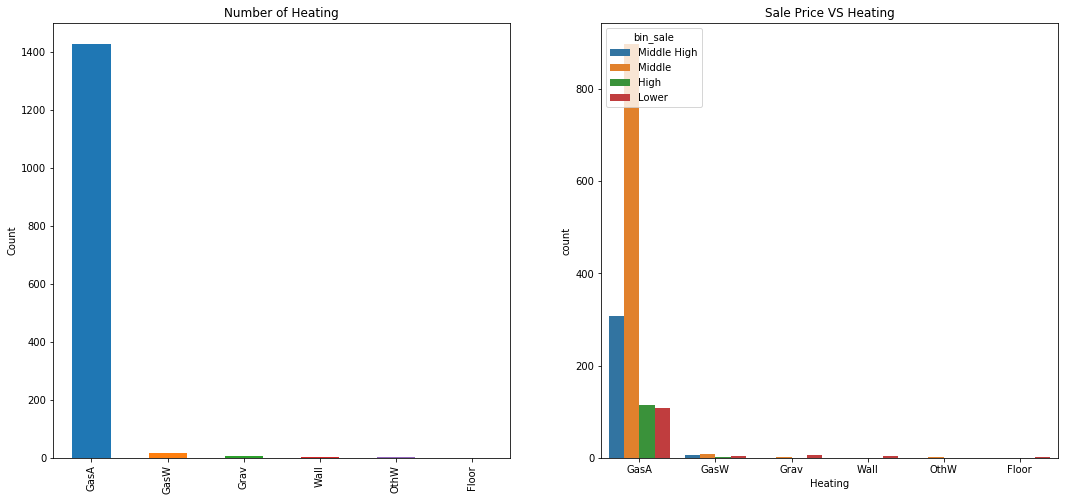

38    暖器品質和狀況
Name: Comments, dtype: object


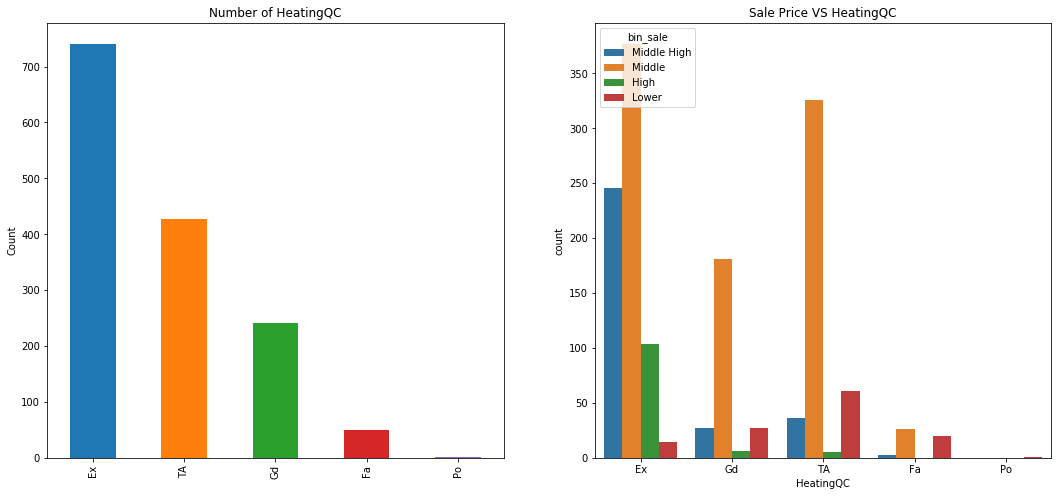

39    中央空調
Name: Comments, dtype: object


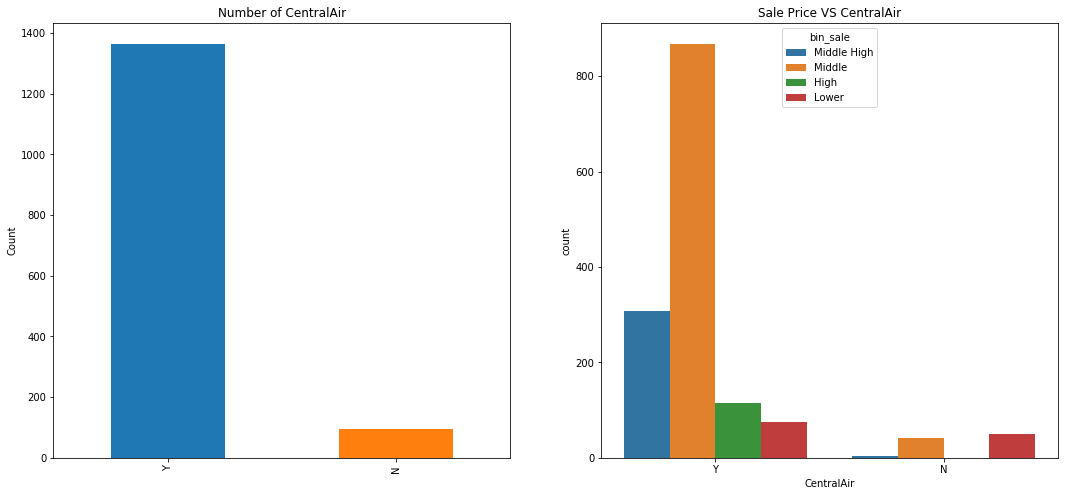

40    用電系統
Name: Comments, dtype: object


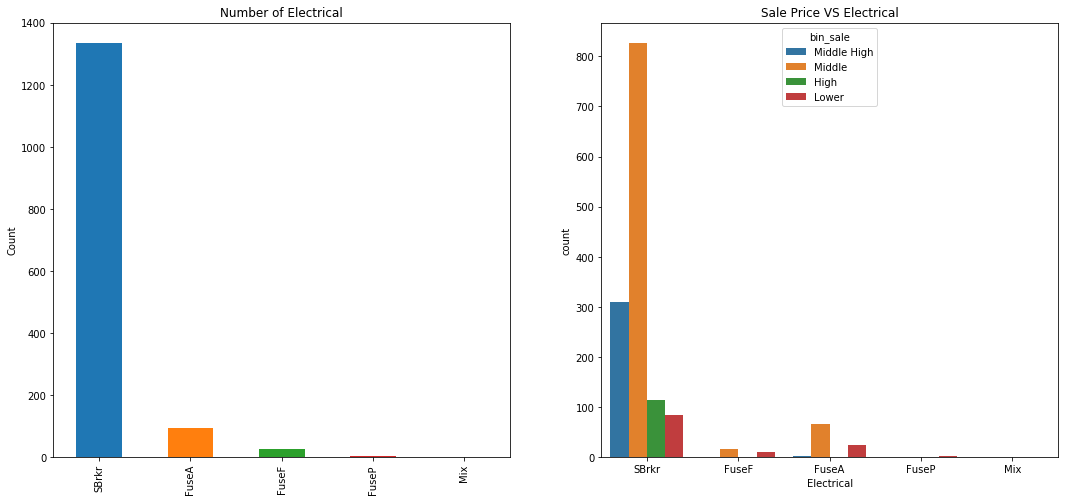

51    廚房品質
Name: Comments, dtype: object


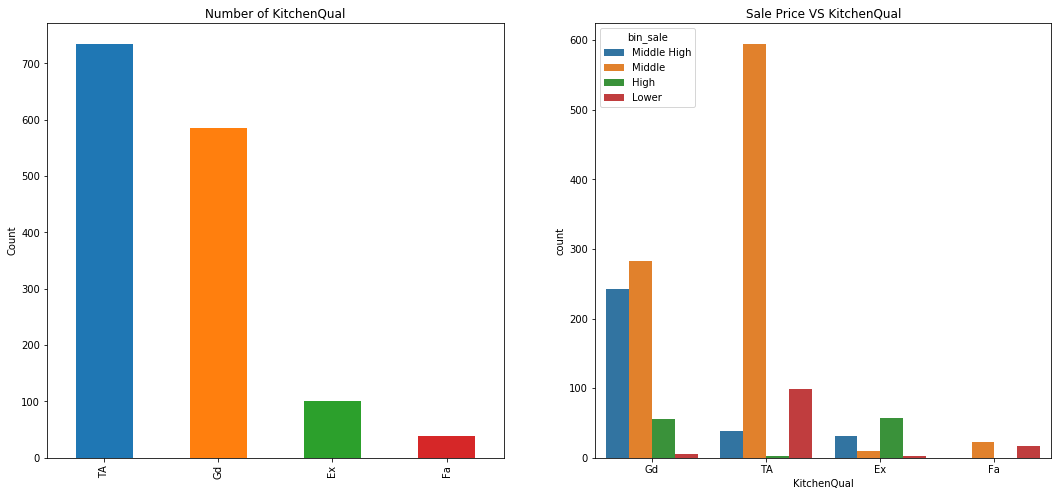

53    居家功能評鑑
Name: Comments, dtype: object


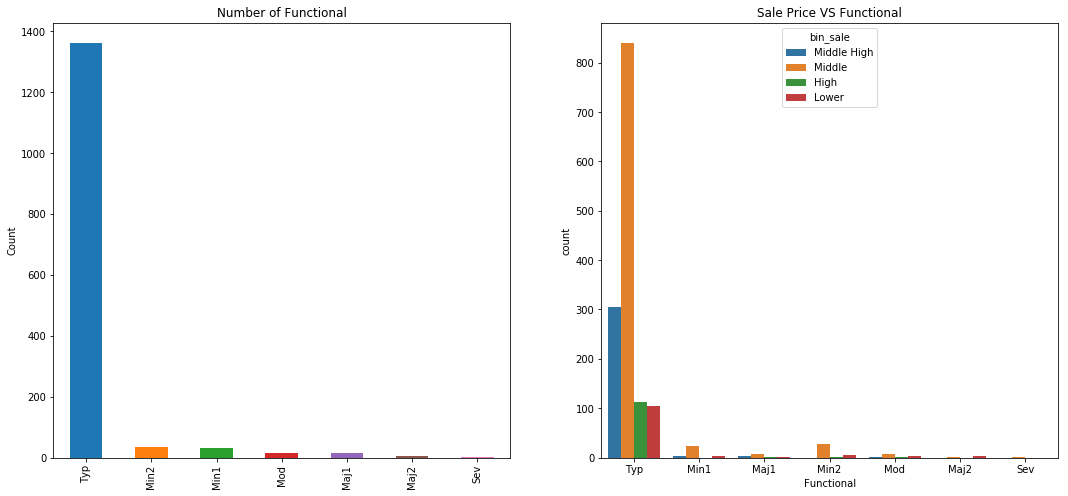

55    壁爐品質
Name: Comments, dtype: object


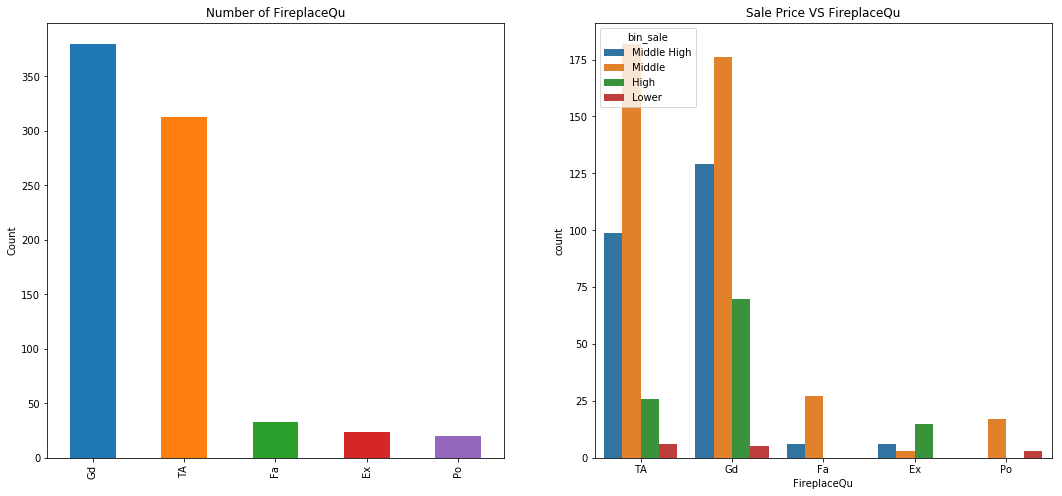

56    車庫位置
Name: Comments, dtype: object


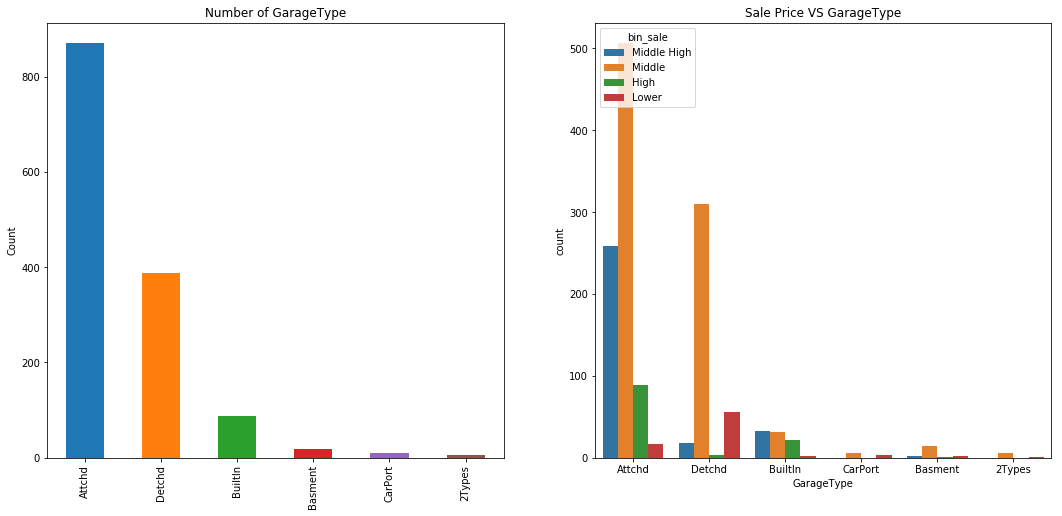

58    車庫內部建置是否完成
Name: Comments, dtype: object


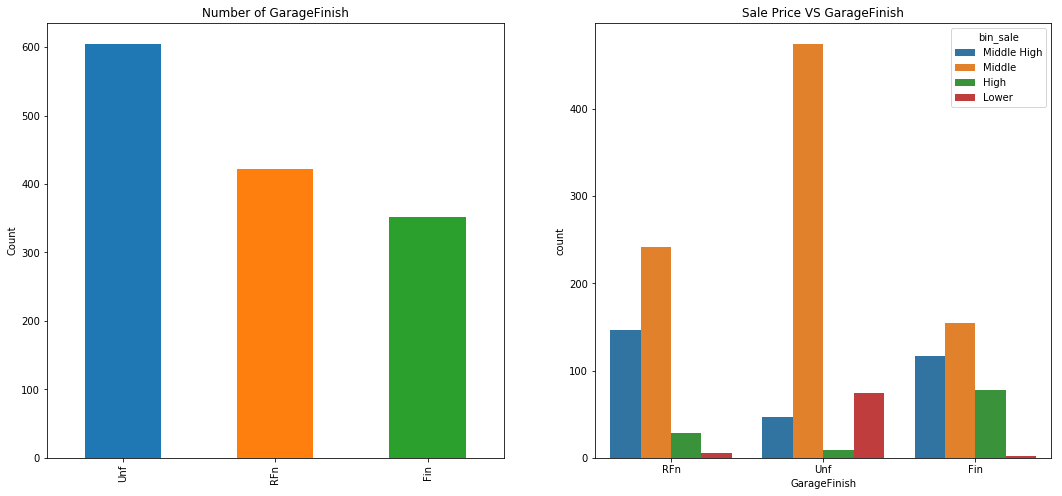

61    車庫品質
Name: Comments, dtype: object


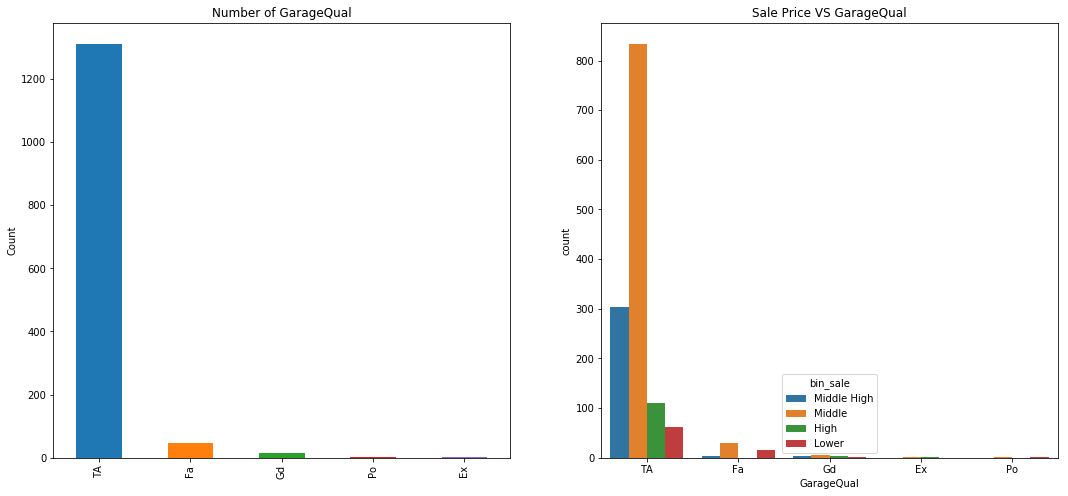

62    車庫狀況
Name: Comments, dtype: object


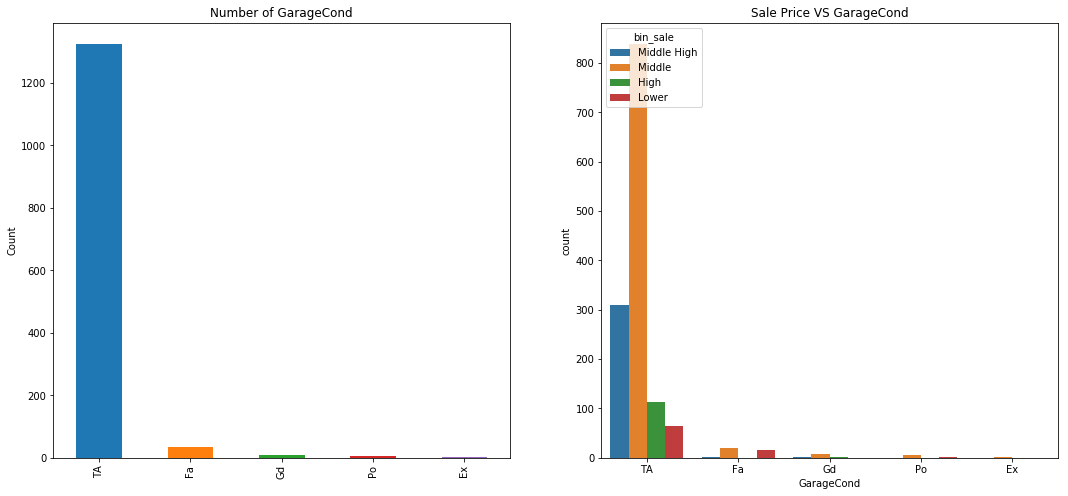

63    車道有沒鋪
Name: Comments, dtype: object


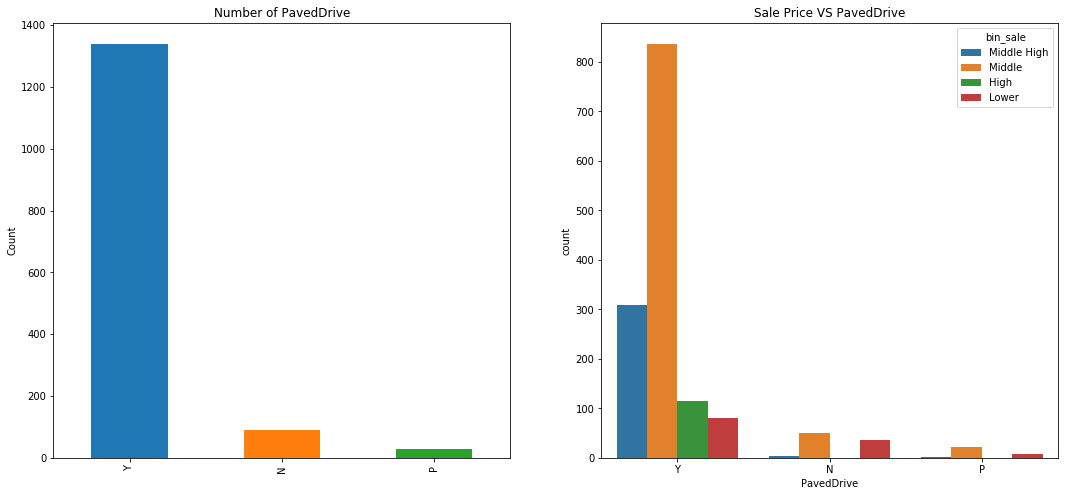

70    游泳池藩籬的品質
Name: Comments, dtype: object


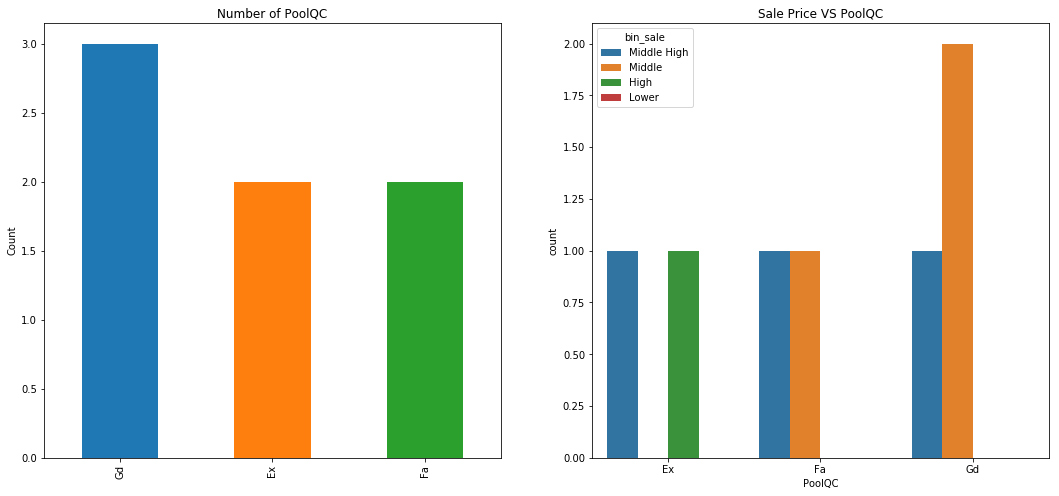

71    有沒有網球場、電梯等等
Name: Comments, dtype: object


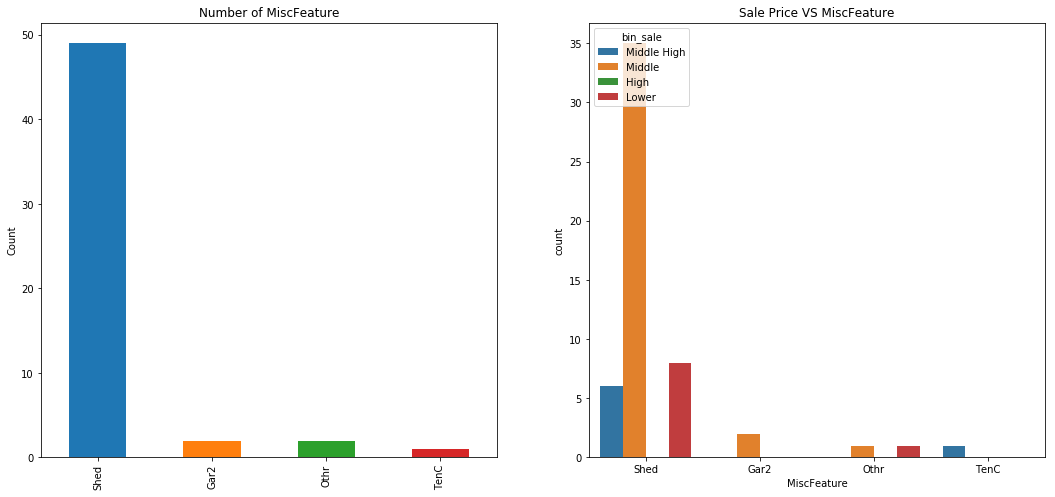

75    藩籬品質
Name: Comments, dtype: object


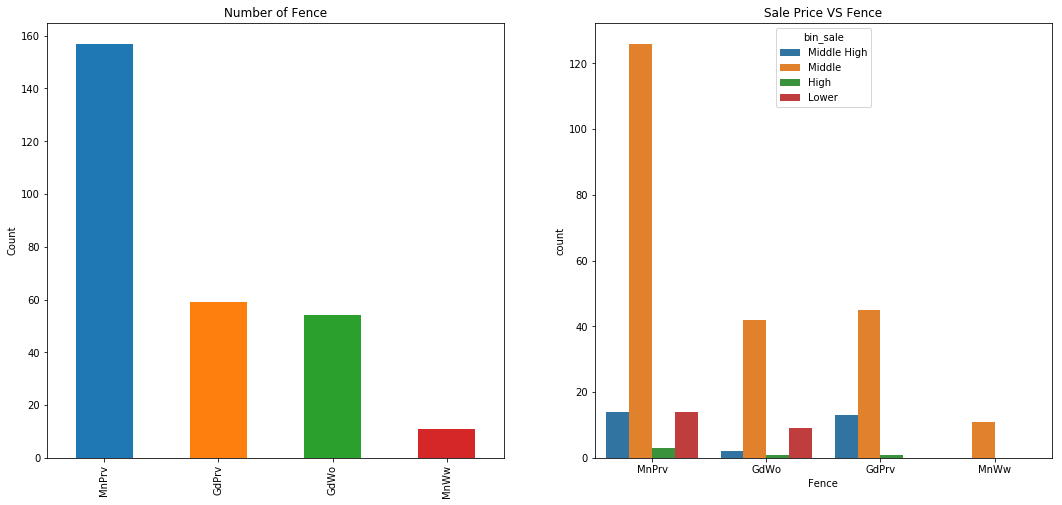

76    銷售狀況
Name: Comments, dtype: object


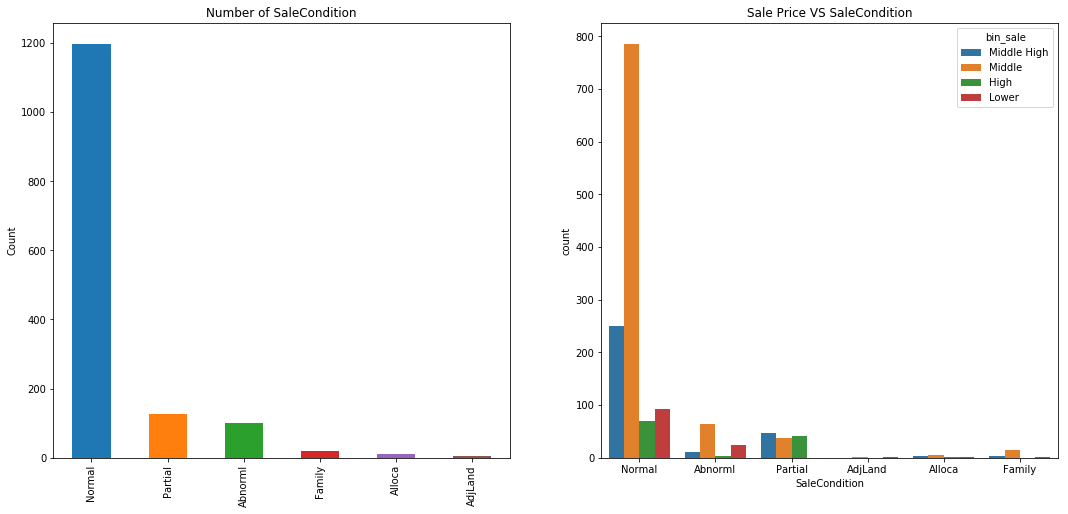

77    銷售型態
Name: Comments, dtype: object


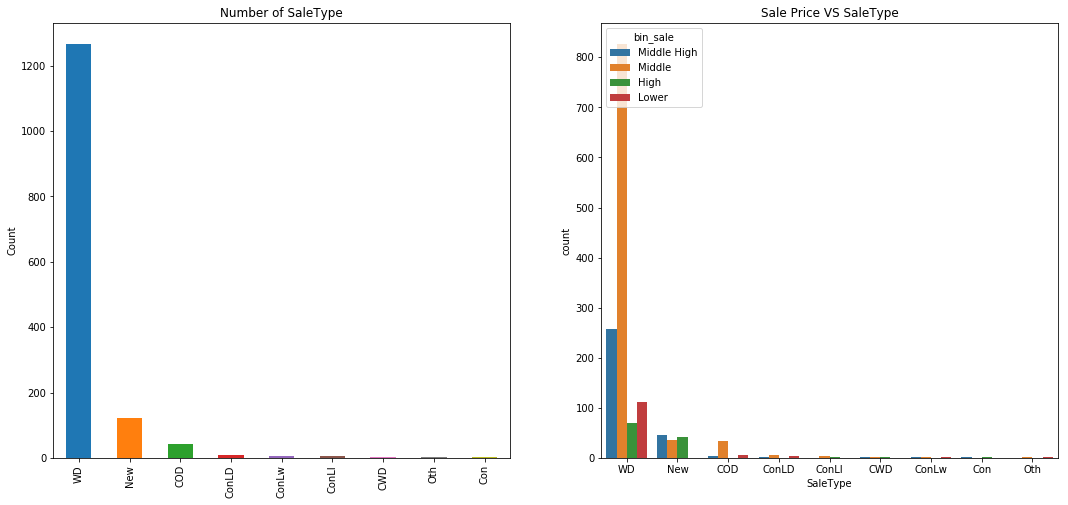

In [18]:
#畫1對1的關係，num數值與sale price的散布圖
def plot_cate(column_name):
    f,ax=plt.subplots(1,2,figsize=(18,8))
    train_data[column_name].value_counts().plot.bar(ax=ax[0])
    ax[0].set_title('Number of ' + column_name)
    ax[0].set_ylabel('Count')
    sns.countplot(column_name,hue='bin_sale',data=train_data,ax=ax[1])
    ax[1].set_title('Sale Price VS '+ column_name)
    plt.show()

for column in cate_list:
    query(column)
    plot_cate(column)

In [ ]:
#plotting correlations
num_feat=houses.columns[houses.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");